In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.use('Qt5Agg')
%matplotlib inline

In [3]:
df = pd.read_csv('datasets/twitter.csv', encoding='ISO-8859-1')
df.columns = ["n","id","Date","Query","User","Text"]

In [4]:
df.head()

,n,id,Date,Query,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [5]:
df=df.drop("n",axis=1)

In [6]:
df.head()

,id,Date,Query,User,Text
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   id      1599999 non-null  int64 
 1   Date    1599999 non-null  object
 2   Query   1599999 non-null  object
 3   User    1599999 non-null  object
 4   Text    1599999 non-null  object
dtypes: int64(1), object(4)
memory usage: 61.0+ MB


In [8]:
df = df[:100000]

In [10]:
from textblob import TextBlob
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import cleantext
import streamlit as st

analyzer = SentimentIntensityAnalyzer()

def classify_sentiment(score):
    if score > 0.8:
        return "Highly Positive"
    elif score > 0.4:
        return "Positive"
    elif -0.4 <= score <= 0.4:
        return "Neutral"
    elif score > -0.8:
        return "Negative"
    else:
        return "Highly Negative"

def analyze_sentiment(texts):
    sentiment_scores = []
    blob_subj = []
    sentiment_classes = []
    for text in texts:
        score = analyzer.polarity_scores(text)["compound"]
        sentiment_scores.append(score)
        blob = TextBlob(text)
        blob_subj.append(blob.subjectivity)
        sentiment_classes.append(classify_sentiment(score))
    return sentiment_scores, blob_subj, sentiment_classes

sentiment_scores, blob_subj, sentiment_classes = analyze_sentiment(df["Text"])

In [11]:
np.average(sentiment_scores)

-0.038490318

In [12]:
np.average(blob_subj)

0.3910215410853102

In [13]:
sentiment_classes

['Negative',
 'Positive',
 'Neutral',
 'Negative',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negative',
 'Neutral',
 'Neutral',
 'Positive',
 'Highly Negative',
 'Neutral',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negative',
 'Negative',
 'Negative',
 'Highly Positive',
 'Neutral',
 'Negative',
 'Neutral',
 'Neutral',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Highly Negative',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Negative',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Negative',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negative',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negative',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negative',


In [14]:
df["Sentiment Analysis"]=sentiment_classes

In [15]:
df["Sentiment Analysis"].value_counts()

Sentiment Analysis
Neutral            54318
Negative           22579
Positive           17703
Highly Positive     2780
Highly Negative     2620
Name: count, dtype: int64

<Axes: >

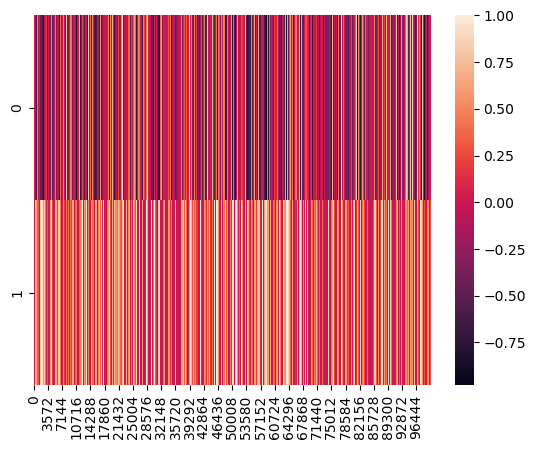

In [75]:
import seaborn as sb
sb.heatmap([sentiment_scores,blob_subj]) 

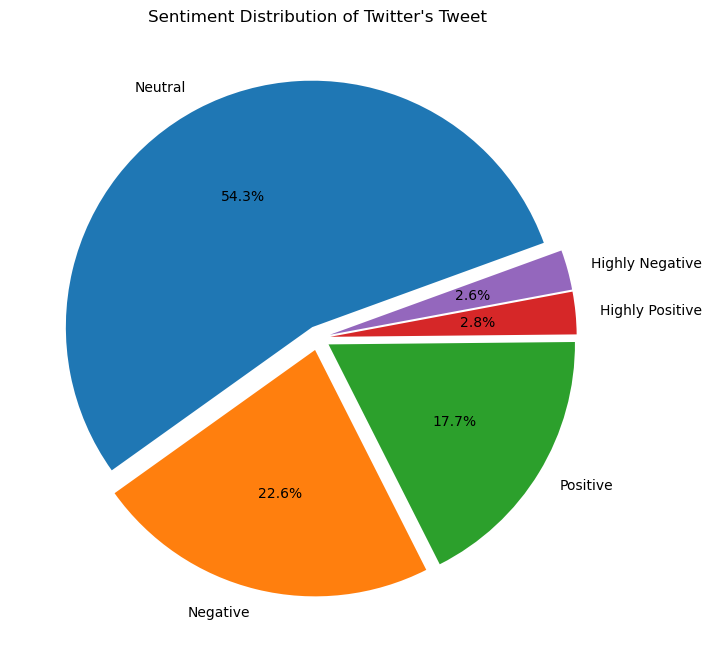

In [16]:
df["Sentiment Analysis"].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], autopct='%1.1f%%', figsize=(8,8),startangle=20)
plt.title("Sentiment Distribution of Twitter's Tweet")
plt.ylabel("")
plt.show()

In [17]:
df= df.drop(["id","Date","Query","User"],axis=1)

In [18]:
df[10:30]

,Text,Sentiment Analysis
10,I just re-pierced my ears,Neutral
11,@caregiving I couldn't bear to watch it. And ...,Negative
12,"@octolinz16 It it counts, idk why I did either...",Neutral
13,"@smarrison i would've been the first, but i di...",Neutral
14,@iamjazzyfizzle I wish I got to watch it with ...,Positive
15,Hollis' death scene will hurt me severely to w...,Highly Negative
16,about to file taxes,Neutral
17,@LettyA ahh ive always wanted to see rent lov...,Positive
18,@FakerPattyPattz Oh dear. Were you drinking ou...,Neutral
19,@alydesigns i was out most of the day so didn'...,Neutral


In [53]:
df1=pd.read_csv("datasets/imdb.csv")

In [54]:
df1.columns = ["Text","label"]

In [55]:
df1 = df1.drop(["label"],axis=1)

In [56]:
df1=df1[:20000]

In [58]:
sentiment_scores1, blob_subj1, sentiment_classes1 = analyze_sentiment(df1["Text"])

In [59]:
np.average(sentiment_scores1)

0.314607385

In [60]:
np.average(blob_subj1)

0.5299180247314078

In [61]:
df1["Sentiment Analysis"]=sentiment_classes1

In [62]:
df1

,Text,Sentiment Analysis
0,I grew up (b. 1965) watching and loving the Th...,Positive
1,"When I put this movie in my DVD player, and sa...",Highly Positive
2,Why do people who do not know what a particula...,Highly Negative
3,Even though I have great interest in Biblical ...,Negative
4,Im a die hard Dads Army fan and nothing will e...,Positive
...,...,...
19995,"I was required to watch the movie for my work,...",Highly Negative
19996,"""White Noise"" had potential to be one of the m...",Highly Negative
19997,The Five Deadly Venoms is a great kung-fu acti...,Negative
19998,Ali G Indahouse has got to be one of the funni...,Highly Positive


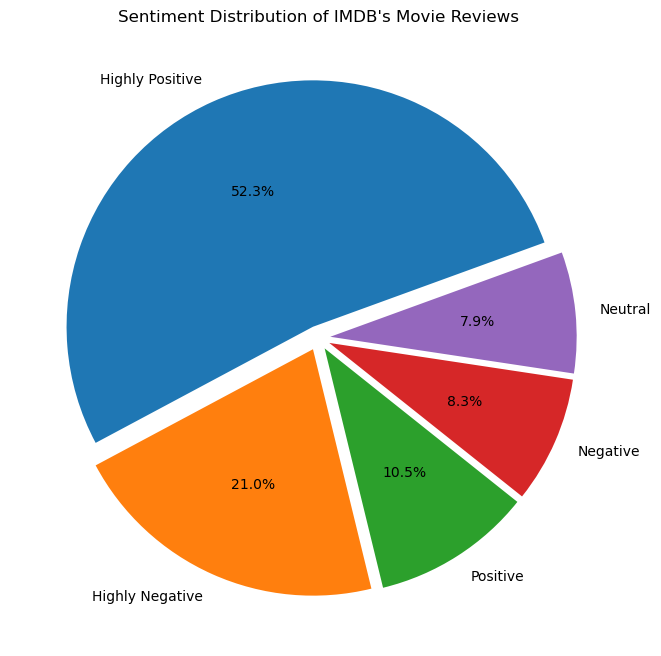

In [63]:
df1["Sentiment Analysis"].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], autopct='%1.1f%%', figsize=(8,8),startangle=20,radius=1)
plt.title("Sentiment Distribution of IMDB's Movie Reviews")
# plt.legend()
plt.ylabel("")
plt.show()

In [67]:
df.rename_axis("No.",inplace=True)
df1.rename_axis("No.",inplace=True)

In [68]:
df.to_csv("twitter.csv")

In [69]:
df1.to_csv("imdb_sentiment.csv")